In [1]:
#produces exactly the same .csv predictions which you used in your best submission to the competition on Kaggle

Loading and pre-processing data

In [2]:
#Load the data - uploading the content of the .csv file
#from loadData import load_data,format_data,load_data_y,format_data_y
import numpy as np
from implementations import *
import matplotlib.pyplot as plt
from proj1_helpers import *

#COMMENTS: 
#- one can also chose "*" to import all the functions in the file. 
#- loadData has to be a ".py" file. Jupiter notebook do not work. 

In [3]:
def std(x):
    """Standardize the original data set."""
    mean_x = np.mean(x)
    x = x - mean_x
    std_x = np.std(x)
    x = x / std_x
    return x

In [4]:
log_flag=True

In [5]:
_,x_test,ids = load_csv_data("test.csv", sub_sample=True);
y_train,x_train,_ = load_csv_data("train.csv", sub_sample=True); #Change flag to True for Logistic Regression
x_train = std(x_train)
x_test = std(x_test)

In [6]:
PCA_flag=False

In [7]:
if(PCA_flag):
    eig_val, eig_vec, j = PCA(x_train)
    print(eig_val)
    plt.plot(eig_val)
    plt.xlabel('dataset feature')
    plt.ylabel('variance percentage')
    plt.savefig('PCA.png')
    plt.show()
    x_train= x_train.dot(eig_vec)
    j

GD Algorithm MSE

In [8]:
#parameters
max_iter = 100
gamma=[0.00008,0.00009,0.0001,0.0002,0.0003]
n_GD=int(len(gamma))

# Initialization
w_initial = np.ones(np.asarray(x_train).shape[1])
GD_loss = []

#apply gradient descent algorithm
for i in range(n_GD):
    ws = w_initial  # initiate weights
    for n_iter in range(max_iter):
        gradient = -((1/len(y_train))*(np.dot(np.transpose(x_train), y_train - np.dot(x_train,ws))))
        # update w by gradient
        ws = ws - gamma[i] * gradient  # updates the new weights

    loss = compute_loss(y_train, x_train, ws)
    GD_loss.append(loss)

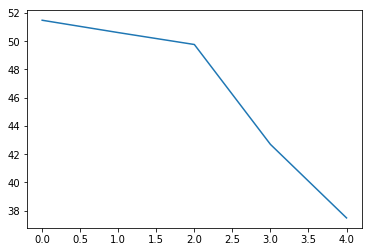

In [9]:
plt.figure()
plt.plot(GD_loss)
plt.show()

SGD MSE 

In [10]:
#parameters
max_iters = 200
gamma=[0.00008,0.00009,0.0001,0.0002,0.0003]
n_GD=int(len(gamma))
batch_size = 50

# Initialization
w_initial = np.ones(x_train.shape[1])
SGD_loss=[]

#apply gradient descent algorithm
for i in range(n_GD):
    w = w_initial
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y_train, x_train, batch_size, num_batches=1):
            gradient = compute_gradient(minibatch_y, minibatch_tx, w)
            # update w by gradient
            w = w - gamma[i] * gradient  # computes the new w(t+1)

    loss = compute_loss(y_train, x_train, w)
    SGD_loss.append(loss)

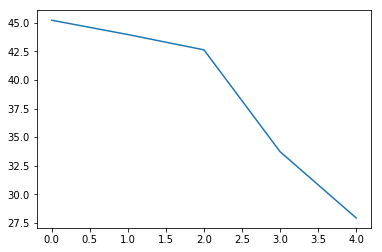

In [11]:
plt.figure()
plt.plot(SGD_loss)
plt.show()

LS MSE

In [12]:
LS_ws, LS_loss = least_squares(y_train, x_train)
LS_loss

0.32544851801767666

In [13]:
LS_y=predict_labels(LS_ws,x_test)

RR MSE

In [14]:
lambda_=[0.005,0.01,0.05,0.1,0.5,1,2,3,5,6,8,10,20,30,40,50,100]
#lambda_=[0.00008,0.00009,0.0001,0.0002,0.0003]
n_RR=int(len(lambda_))
error=[]

for i in range(n_RR):
    RR_ws, RR_loss = ridge_regression(y_train,x_train,lambda_[i])
    error.append(RR_loss)
    

data = np.asarray(error)
min(data)

0.37151046409104949

In [15]:
RR_y=predict_labels(RR_ws,x_test)

LR_MSE

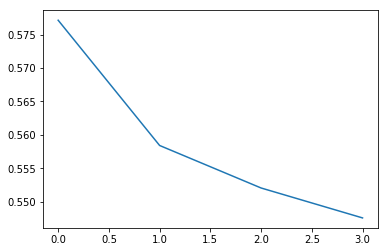

In [16]:
#parameters
max_iters = 500
gamma=[0.05, 0.1,0.15,0.2]
n_LR=int(len(gamma))

# Initialization
w_initial = np.ones(x_train.shape[1])
data = []

#apply Logistic Regression algorithm
for i in range(n_LR):
    LR_ws, LR_loss = logistic_regression(y_train, x_train, w_initial, max_iters, gamma[i])
    data.append(LR_loss)
        
        
plt.figure()
plt.plot(data)
plt.show()